In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_hg = pd.read_parquet('/content/drive/MyDrive/hourly_gas_combined.snappy.parquet', engine='pyarrow')
df_md = pd.read_parquet('/content/drive/MyDrive/metdata_combined.snappy.parquet', engine='pyarrow')

In [8]:
df_hg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067389 entries, 0 to 3067388
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   SITE_ID      object        
 1   DATE_TIME    datetime64[ns]
 2   PARAMETER    object        
 3   VALUE        object        
 4   VALUE_F      object        
 5   QA_CODE      object        
 6   UPDATE_DATE  datetime64[ns]
 7   Filename     object        
dtypes: datetime64[ns](2), object(6)
memory usage: 187.2+ MB


In [9]:
df_hg

SITE_ID           DATE_TIME PARAMETER     VALUE VALUE_F QA_CODE  \
0        BVL130 2020-01-01 00:00:00        CO  270.3000       I       3   
1        BVL130 2020-01-01 00:00:00        NO    0.0220       U       3   
2        BVL130 2020-01-01 00:00:00       NOY    2.1780    None       3   
3        BVL130 2020-01-01 00:00:00    NOYDIF    2.1550    None       3   
4        BVL130 2020-01-01 00:00:00    SO2_GA    0.3730       U       3   
...         ...                 ...       ...       ...     ...     ...   
3067384  ROM206 2014-12-31 22:00:00       NOY    1.2390    None       3   
3067385  ROM206 2014-12-31 22:00:00    NOYDIF    1.1270    None       3   
3067386  ROM206 2014-12-31 23:00:00        NO    0.1630       U       3   
3067387  ROM206 2014-12-31 23:00:00       NOY    1.8980    None       3   
3067388  ROM206 2014-12-31 23:00:00    NOYDIF    1.7340    None       3   

                UPDATE_DATE             Filename  
0       2020-01-01 00:00:00  hourly_gas_2020.csv  
1       2020-01-01 00:00:00  hourly_gas_2020.csv  
2       2020-01-01 00:00:00  hourly_gas_2020.csv  
3       2020-01-01 00:00:00  hourly_gas_2020.csv  
4       2020-01-01 00:00:00  hourly_gas_2020.csv  
...                     ...                  ...  
3067384 2014-12-31 22:00:00  hourly_gas_2014.csv  
3067385 2014-12-31 22:00:00  hourly_gas_2014.csv  
3067386 2014-12-31 23:00:00  hourly_gas_2014.csv  
3067387 2014-12-31 23:00:00  hourly_gas_2014.csv  
3067388 2014-12-31 23:00:00  hourly_gas_2014.csv  

[3067389 rows x 8 columns]

In [18]:
print((df_hg['DATE_TIME'] == df_hg['UPDATE_DATE']).all()) # check if DATE_TIME and UPDATE_DATE are the same

True


In [19]:
df_hg.drop('UPDATE_DATE', axis=1, inplace=True)

<ipython-input-19-ad00ab156092>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hg.drop('UPDATE_DATE', axis=1, inplace=True)


In [20]:
# Whether or not drop rows of invalid data quality
invalid_F = ['B','C','D','F','I','M','N']
df_hg = df_hg[~df_hg['VALUE_F'].isin(invalid_F)]

In [22]:
# We want to take all Parameters as features based on SITE_ID and DATE_TIME
# but it seems difficult to extract all features for the same site at a given time point
df_hg_pivot = df_hg.pivot_table(index=['SITE_ID','DATE_TIME','QA_CODE'], columns='PARAMETER',values='VALUE')
df_hg_pivot

PARAMETER                            CO  FLOW_23M  FLOW_2M  HNO3  NH3     NO  \
SITE_ID DATE_TIME           QA_CODE                                            
BEL116  2013-01-01 00:00:00 3       NaN       NaN      NaN   NaN  NaN  0.053   
        2013-01-01 01:00:00 3       NaN       NaN      NaN   NaN  NaN  0.066   
        2013-01-01 02:00:00 3       NaN       NaN      NaN   NaN  NaN  0.151   
        2013-01-01 03:00:00 3       NaN       NaN      NaN   NaN  NaN  0.722   
        2013-01-01 04:00:00 3       NaN       NaN      NaN   NaN  NaN  0.989   
...                                  ..       ...      ...   ...  ...    ...   
ROM206  2022-12-31 19:00:00 1       NaN       NaN      NaN   NaN  NaN  0.039   
        2022-12-31 20:00:00 1       NaN       NaN      NaN   NaN  NaN  0.000   
        2022-12-31 21:00:00 1       NaN       NaN      NaN   NaN  NaN  0.030   
        2022-12-31 22:00:00 1       NaN       NaN      NaN   NaN  NaN  0.032   
        2022-12-31 23:00:00 1       NaN       NaN      NaN   NaN  NaN  0.018   

PARAMETER                            NO2_TRUE  NOX  NOXDIF  NOX_TRUE  ...  \
SITE_ID DATE_TIME           QA_CODE                                   ...   
BEL116  2013-01-01 00:00:00 3             NaN  NaN     NaN       NaN  ...   
        2013-01-01 01:00:00 3             NaN  NaN     NaN       NaN  ...   
        2013-01-01 02:00:00 3             NaN  NaN     NaN       NaN  ...   
        2013-01-01 03:00:00 3             NaN  NaN     NaN       NaN  ...   
        2013-01-01 04:00:00 3             NaN  NaN     NaN       NaN  ...   
...                                       ...  ...     ...       ...  ...   
ROM206  2022-12-31 19:00:00 1             NaN  NaN     NaN       NaN  ...   
        2022-12-31 20:00:00 1             NaN  NaN     NaN       NaN  ...   
        2022-12-31 21:00:00 1             NaN  NaN     NaN       NaN  ...   
        2022-12-31 22:00:00 1             NaN  NaN     NaN       NaN  ...   
        2022-12-31 23:00:00 1             NaN  NaN     NaN       NaN  ...   

PARAMETER                            O3_17M  O3_20M  O3_23M  O3_28M  O3_2M  \
SITE_ID DATE_TIME           QA_CODE                                          
BEL116  2013-01-01 00:00:00 3           NaN     NaN     NaN     NaN    NaN   
        2013-01-01 01:00:00 3           NaN     NaN     NaN     NaN    NaN   
        2013-01-01 02:00:00 3           NaN     NaN     NaN     NaN    NaN   
        2013-01-01 03:00:00 3           NaN     NaN     NaN     NaN    NaN   
        2013-01-01 04:00:00 3           NaN     NaN     NaN     NaN    NaN   
...                                     ...     ...     ...     ...    ...   
ROM206  2022-12-31 19:00:00 1           NaN     NaN     NaN     NaN    NaN   
        2022-12-31 20:00:00 1           NaN     NaN     NaN     NaN    NaN   
        2022-12-31 21:00:00 1           NaN     NaN     NaN     NaN    NaN   
        2022-12-31 22:00:00 1           NaN     NaN     NaN     NaN    NaN   
        2022-12-31 23:00:00 1           NaN     NaN     NaN     NaN    NaN   

PARAMETER                            O3_6M  SO2_GA  TEMP_23M  TEMP_2M  TNX  
SITE_ID DATE_TIME           QA_CODE                                         
BEL116  2013-01-01 00:00:00 3          NaN   0.615       NaN      NaN  NaN  
        2013-01-01 01:00:00 3          NaN   0.459       NaN      NaN  NaN  
        2013-01-01 02:00:00 3          NaN   0.381       NaN      NaN  NaN  
        2013-01-01 03:00:00 3          NaN   0.187       NaN      NaN  NaN  
        2013-01-01 04:00:00 3          NaN   0.106       NaN      NaN  NaN  
...                                    ...     ...       ...      ...  ...  
ROM206  2022-12-31 19:00:00 1          NaN     NaN       NaN      NaN  NaN  
        2022-12-31 20:00:00 1          NaN     NaN       NaN      NaN  NaN  
        2022-12-31 21:00:00 1          NaN     NaN       NaN      NaN  NaN  
        2022-12-31 22:00:00 1          NaN     NaN       NaN      NaN  NaN  
        2022-12-31

In [21]:
df_hg.isnull().sum()

SITE_ID            0
DATE_TIME          0
PARAMETER          0
VALUE           1058
VALUE_F      1607916
QA_CODE            0
Filename           0
dtype: int64

In [17]:
df_hg[df_hg['VALUE'].isnull()]['PARAMETER'].unique()

array(['NOYDIF', 'HNO3', 'NH3', 'NO', 'NO2_TRUE', 'NOX_TRUE', 'NOY',
       'NOY_MINUS', 'TNX', 'NOX', 'NOXDIF', 'O3_14M', 'O3_20M', 'O3_23M',
       'O3_10M', 'O3_28M', 'O3_2M', 'O3_6M'], dtype=object)

In [23]:
df_hg = df_hg.dropna(subset=['VALUE']) # drop rows with null values in VALUE column
df_hg

SITE_ID           DATE_TIME PARAMETER   VALUE VALUE_F QA_CODE  \
1        BVL130 2020-01-01 00:00:00        NO  0.0220       U       3   
2        BVL130 2020-01-01 00:00:00       NOY  2.1780    None       3   
3        BVL130 2020-01-01 00:00:00    NOYDIF  2.1550    None       3   
4        BVL130 2020-01-01 00:00:00    SO2_GA  0.3730       U       3   
6        BVL130 2020-01-01 01:00:00        NO  0.0290       U       3   
...         ...                 ...       ...     ...     ...     ...   
3067384  ROM206 2014-12-31 22:00:00       NOY  1.2390    None       3   
3067385  ROM206 2014-12-31 22:00:00    NOYDIF  1.1270    None       3   
3067386  ROM206 2014-12-31 23:00:00        NO  0.1630       U       3   
3067387  ROM206 2014-12-31 23:00:00       NOY  1.8980    None       3   
3067388  ROM206 2014-12-31 23:00:00    NOYDIF  1.7340    None       3   

                UPDATE_DATE             Filename  
1       2020-01-01 00:00:00  hourly_gas_2020.csv  
2       2020-01-01 00:00:00  hourly_gas_2020.csv  
3       2020-01-01 00:00:00  hourly_gas_2020.csv  
4       2020-01-01 00:00:00  hourly_gas_2020.csv  
6       2020-01-01 01:00:00  hourly_gas_2020.csv  
...                     ...                  ...  
3067384 2014-12-31 22:00:00  hourly_gas_2014.csv  
3067385 2014-12-31 22:00:00  hourly_gas_2014.csv  
3067386 2014-12-31 23:00:00  hourly_gas_2014.csv  
3067387 2014-12-31 23:00:00  hourly_gas_2014.csv  
3067388 2014-12-31 23:00:00  hourly_gas_2014.csv  

[2502042 rows x 8 columns]

In [3]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8443813 entries, 0 to 8443812
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   SITE_ID                object        
 1   DATE_TIME              datetime64[ns]
 2   TEMPERATURE            object        
 3   TEMPERATURE_F          object        
 4   TEMPERATURE_DELTA      object        
 5   TEMPERATURE_DELTA_F    object        
 6   RELATIVE_HUMIDITY      object        
 7   RELATIVE_HUMIDITY_F    object        
 8   SOLAR_RADIATION        object        
 9   SOLAR_RADIATION_F      object        
 10  OZONE                  object        
 11  OZONE_F                object        
 12  PRECIPITATION          object        
 13  PRECIPITATION_F        object        
 14  WINDSPEED              object        
 15  WINDSPEED_F            object        
 16  WIND_DIRECTION         object        
 17  WIND_DIRECTION_F       object        
 18  SIGMA_THETA           

In [4]:
# Delete those columns that have more than half null values
for col in df_md.columns:
  if df_md[col].isnull().sum() > len(df_md)/2:
    df_md.drop(col, axis=1, inplace=True)

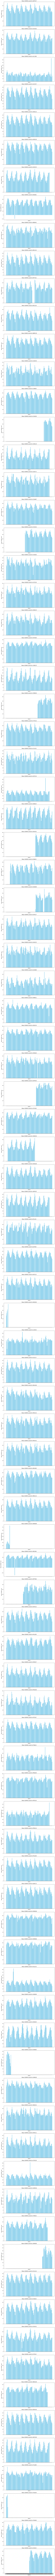

In [6]:
df_md = df_md.dropna(subset=['OZONE']) # drop rows with null values in OZONE column

# Extract month from DATE_TIME
df_md['MONTH'] = df_md['DATE_TIME'].dt.to_period('M')

# Group by 'SITE_ID' and 'MONTH', then calculate the mean OZONE value
mean_ozone = df_md.groupby(['SITE_ID', 'MONTH'])['OZONE'].mean().reset_index()

# Get the unique list of sites
sites = mean_ozone['SITE_ID'].unique()

# Create subplots - one row for each site
fig, axes = plt.subplots(nrows=len(sites), ncols=1, figsize=(10, 5 * len(sites)), sharex=True)

# If there's only one site, wrap the axes object in a list for consistent indexing
if len(sites) == 1:
    axes = [axes]

# Loop over each site and create a subplot
for i, site in enumerate(sites):
    site_data = mean_ozone[mean_ozone['SITE_ID'] == site]
    axes[i].bar(site_data['MONTH'].dt.strftime('%Y-%m'), site_data['OZONE'], color='skyblue')
    axes[i].set_title(f'Mean OZONE Levels for {site}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Mean OZONE Level')
    # Only set xlabel for the last subplot
    if i == len(sites) - 1:
        axes[i].set_xlabel('MONTH')

# Set a tight layout to manage spacing between plots
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
df_md.isnull().sum()

SITE_ID                      0
DATE_TIME                    0
TEMPERATURE              23092
TEMPERATURE_DELTA_F     400506
RELATIVE_HUMIDITY_F    2507220
SOLAR_RADIATION_F      2730391
OZONE                        0
PRECIPITATION_F        2513366
WINDSPEED_F            2602575
WIND_DIRECTION_F       2632636
SIGMA_THETA_F          2729800
FLOW_RATE               233472
WINDSPEED_SCALAR_F     2865794
WETNESS_F               421327
SHELTER_TEMPERATURE      93258
QA_CODE                      0
UPDATE_DATE                  0
Filename                     0
MONTH                        0
dtype: int64

In [20]:
df_md

SITE_ID           DATE_TIME TEMPERATURE TEMPERATURE_DELTA_F  \
0        ABT147 2021-01-01 00:00:00     -1.6250                   M   
1        ABT147 2021-01-01 01:00:00     -1.7830                   M   
2        ABT147 2021-01-01 02:00:00     -2.4330                   M   
3        ABT147 2021-01-01 03:00:00     -2.2870                   M   
4        ABT147 2021-01-01 04:00:00     -2.4690                   M   
...         ...                 ...         ...                 ...   
8443808  YOS404 2013-12-31 19:00:00      9.6000                   M   
8443809  YOS404 2013-12-31 20:00:00      9.1000                   M   
8443810  YOS404 2013-12-31 21:00:00      8.6999                   M   
8443811  YOS404 2013-12-31 22:00:00      8.3999                   M   
8443812  YOS404 2013-12-31 23:00:00      8.3999                   M   

        RELATIVE_HUMIDITY_F SOLAR_RADIATION_F    OZONE PRECIPITATION_F  \
0                         M                 M  24.7400               M   
1                         M                 M  24.2700               M   
2                         M                 M  22.1200               M   
3                         M                 M  23.5800               M   
4                         M                 M  24.0400               M   
...                     ...               ...      ...             ...   
8443808                None              None  40.0000            None   
8443809                None              None  40.0000            None   
8443810                None              None  40.0000            None   
8443811                None              None  41.0000            None   
8443812                None              None  42.0000            None   

        WINDSPEED_F WIND_DIRECTION_F SIGMA_THETA_F FLOW_RATE  \
0                 M                M             M    1.5010   
1                 M                M             M    1.5010   
2                 M                M             M    1.5010   
3                 M                M             M    1.5010   
4                 M                M             M    1.5010   
...             ...              ...           ...       ...   
8443808        None             None          None    3.0000   
8443809        None             None          None    3.0000   
8443810        None             None          None    3.0000   
8443811        None             None          None    3.0000   
8443812        None             None          None    3.0000   

        WINDSPEED_SCALAR_F WETNESS_F SHELTER_TEMPERATURE  QA_CODE  \
0                        M         M             23.4700      3.0   
1                        M         M             23.4600      3.0   
2                        M         M             23.3300      3.0   
3                        M         M             23.5700      3.0   
4                        M         M             23.4300      3.0   
...                    ...       ...                 ...      ...   
8443808               None         M             22.9000      3.0   
8443809               None         M             22.7000      3.0   
8443810               None         M             22.6000      3.0   
8443811               None         M             22.7999      3.0   
8443812               None         M             22.1000      3.0   

                UPDATE_DATE          Filename    MONTH  
0       2021-01-01 00:00:00  metdata_2021.csv  2021-01  
1       2021-01-01 01:00:00  metdata_2021.csv  2021-01  
2       2021-01-01 02:00:00  metdata_2021.csv  2021-01  
3       2021-01-01 03:00:00  metdata_2021.csv  2021-01  
4       2021-01-01 04:00:00  metdata_2021.csv  2021-01  
...                     ...               ...      ...  
8443808 2013-12-31 19:00:00  metdata_2013.csv  2013-12  
8443809 2013-12-31 20:00:00  metdata_2013.csv  2013-12  
8443810 2013-12-31 21:00:00  metdata_2013.csv  2013-12  
8443811 2013-12-31 22:00:00  metdata_2013.csv  2013-12  
8443812 2013-12-31 23:00:00  metdata_2013

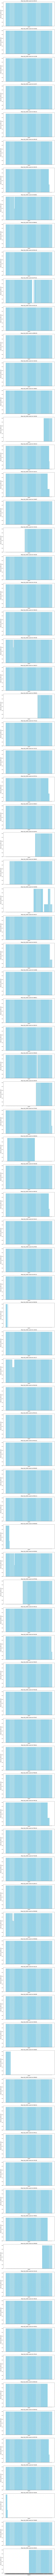

In [21]:
# Group by 'SITE_ID' and 'MONTH', then calculate the mean QA_CODE value
df_md = df_md.astype({"QA_CODE": float})
mean_qa = df_md.groupby(['SITE_ID', 'MONTH'])['QA_CODE'].mean().reset_index()

# Get the unique list of sites
sites = mean_qa['SITE_ID'].unique()

# Create subplots - one row for each site
fig, axes = plt.subplots(nrows=len(sites), ncols=1, figsize=(10, 5 * len(sites)), sharex=True)

# If there's only one site, wrap the axes object in a list for consistent indexing
if len(sites) == 1:
    axes = [axes]

# Loop over each site and create a subplot
for i, site in enumerate(sites):
    site_data = mean_qa[mean_qa['SITE_ID'] == site]
    axes[i].bar(site_data['MONTH'].dt.strftime('%Y-%m'), site_data['QA_CODE'], color='skyblue')
    axes[i].set_title(f'Mean QA_CODE Levels for {site}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Mean QA_CODE Level')
    # Only set xlabel for the last subplot
    if i == len(sites) - 1:
        axes[i].set_xlabel('MONTH')

# Set a tight layout to manage spacing between plots
plt.tight_layout()

# Show the plot
plt.show()